In [3]:
import pandas as pd
import numpy as np
import data_utils
from Imputer import Imputer, ImputerStrategy

dataset = pd.read_csv('datasets/dataset.csv')
display(dataset.head())
print(dataset.shape)
print(dataset.columns)

,ENT_TIPOVIG_SNS,ENT_COD_DEPTO,PQR_TIPOATENCION,AFEC_POBESPECIAL,ENT_COD_MPIO,IDRANGOEDADES,RIESGO_VIDA,AFEC_TIPOPER,AFEC_EDADR,AFEC_MPIO,...,ALTO_COSTO,MES,PQR_ESTADO,IDPATOLOGIA_2,MACROMOTIVO,PQR_CLASE_SNS,PATOLOGIA_TIPO,ENT_TIPOVIG,AFEC_GETNICO,ENT_MPIO
0,regimen subsidiado,63,peticion directa,no aplica,63130,0,no,natural,de 13 a 17 años,bogotá,...,0.0,1,cerrado,0.0,restriccion en el acceso a los servicios de salud,pqr,problemas relacionados con facilidades de aten...,regimen subsidiado,no aplica,calarca
1,regimen subsidiado,52,0,no aplica,52573,0,no,natural,de 0 a 5 años,puerres,...,0.0,1,cerrado,0.0,restriccion en el acceso a los servicios de salud,pqr,problemas relacionados con facilidades de aten...,regimen subsidiado,no aplica,puerres
2,regimen contributivo,76,0,no aplica,76001,0,no,natural,de 13 a 17 años,cali,...,0.0,1,cerrado,0.0,restriccion en el acceso a los servicios de salud,pqr,problemas relacionados con facilidades de aten...,regimen contributivo,no aplica,cali
3,regimen contributivo,41,0,no aplica,41001,0,no,natural,de 13 a 17 años,neiva,...,0.0,1,cerrado,0.0,restriccion en el acceso a los servicios de salud,pqr,problemas relacionados con facilidades de aten...,regimen contributivo,no aplica,neiva
4,regimen contributivo,66,0,persona en condición de discapacidad,66001,0,si,natural,de 13 a 17 años,dosquebradas,...,0.0,1,pendiente (avance),0.0,restriccion en el acceso a los servicios de salud,pqr,epilepsia,regimen contributivo,no aplica,pereira


(2375371, 47)
Index(['ENT_TIPOVIG_SNS', 'ENT_COD_DEPTO', 'PQR_TIPOATENCION',
       'AFEC_POBESPECIAL', 'ENT_COD_MPIO', 'IDRANGOEDADES', 'RIESGO_VIDA',
       'AFEC_TIPOPER', 'AFEC_EDADR', 'AFEC_MPIO', 'TRIM', 'ENT_DPTO',
       'AFEC_REGAFILIACION', 'ENT_MPIO_DANE', 'MOTIVO_ESPECIFICO',
       'PET_COD_DEPTO', 'AFEC_GENERO', 'MOTIVO_GENERAL', 'COD_MOTESP',
       'AFEC_DPTO', 'PATOLOGIA_1', 'CIE_10', 'COD_MACROMOT', 'ENT_NOMBRE',
       'PQR_GRUPOALERTA', 'ENT_COD_SNS', 'PQR_TIPOPETICION', 'COD_MOTGEN',
       'PET_DPTO', 'AFEC_PARENTESCO', 'AFEC_EDUC', 'PET_TIPOPER', 'year',
       'ENT_AMBITOIVC', 'ID_MES', 'PQR_CANAL', 'PET_MPIO', 'ALTO_COSTO', 'MES',
       'PQR_ESTADO', 'IDPATOLOGIA_2', 'MACROMOTIVO', 'PQR_CLASE_SNS',
       'PATOLOGIA_TIPO', 'ENT_TIPOVIG', 'AFEC_GETNICO', 'ENT_MPIO'],
      dtype='object')


# Features

|Feature|Description|Values|
| -------------:|-------------:| -----:|
|AFEC_DPTO| Corresponds to the name of the Department according to where the affected person resides.
|AFEC_EDADR| Corresponds to the age range of the affected person| DE 0 A 5 AÑOS, DE 13 A 17 AÑOS, DE 18 A 24 AÑOS, DE 25 A 29 AÑOS, DE 30 A 37 AÑOS, DE 38 A 49 AÑOS, DE 50 A 62 AÑOS, DE 6 A 12 AÑOS, Mayor de 63 AÑOS.
|AFEC_EDUC| Corresponds to the degree of education of the affected person| Ninguno, Secundaria, Primaria Incompleta, Universitario, Primaria, Universitario Incompleto, Secundaria Incompleta y Posgrado.
|AFEC_GENERO| Corresponds to the gender of the affected person| Hombre – Mujer.
|AFEC_GETNICO| Corresponds to the ethnic group of the affected person| No aplica, Afrocolombiano o Afrodescendiente, Indígena, Negro, Indígena, Mulato, ROM- Gitano, Raizal (del Archipiélago de San Andrés y Providencia) y Palanquero (de San Basilio).
|AFEC_MPIO| Corresponds to the name of the Municipality where the affected person resides.
|AFEC_PARENTESCO| Corresponds to the relationship between the person filing the complaint (petitioner) and the affected party| Abuelo (a), Madre, Padre, Nombre Propio, Empleador, Conyugue, Hermano (a), Hijo (a) Tio (a), IPS, Ciudador (a), Nieto (a), Representante Legal, veedor, Amigo (a), Otro.
|AFEC_POBESPECIAL| Corresponds to the special group of the affected person| No aplica, Persona en Condición de Discapacidad, Mujer en estado de Gestación, Población Carcelaria (Presos), Violencia de género, Desplazado, Habitante de la Calle y Trabajador Sexual.
|AFEC_REGAFILIACION| Corresponds to the affiliation regime of the affected person| Subsidiado, Contributivo, Régimen Especial, Particular y PPNA.
|AFEC_TIPOPER| Corresponds to the type of person affected| Natural o Jurídica.
|ALTO_COSTO| Describe when the claim is a high cost event.
|CIE_10| International Classification of Diseases.
|COD_MACROMOT| Corresponds to the code assigned to the macro reason for the complaint or request for information.
|COD_MOTESP| Corresponds to the code assigned to the specific reason for the complaint or request for information.
|COD_MOTGEN| Corresponds to the code assigned to the general reason for the complaint or request for information.
|ENT_AMBITOIVC| Corresponds to the type of person being monitored, which belongs to the entity the complaint is about.
|ENT_COD_DEPTO| Corresponds to the code of the department of the entity.
|ENT_COD_MPIO| Corresponds to the entity's municipality code.
|ENT_COD_SNS| Corresponds to the code of the entity the complaint is about.
|ENT_DPTO| Corresponds to the name of the entity department.
|ENT_MPIO| Corresponds to the name of the municipality of entity.
|ENT_MPIO_DANE| Corresponds to the name of the entity municipality.
|ENT_NOMBRE| Corresponds to the name of the entity the complaint is about.
|ENT_TIPOVIG| Corresponds to the type of person being monitored, which belongs to the entity the complaint is about.
|ENT_TIPOVIG_SNS| Corresponds to the type of person being monitored, which belongs to the entity of which the complaint is handled.
|MES| Describe in numerical format from 1 to 12, the month in which the complaint or request for information is filed.
|PATOLOGIA_TIPO| Corresponds to the specific name of the pathology that treats the complaint.
|PET_COD_DEPTO| Corresponds to the code of the department where the person filing the complaint or request for information resides.
|PET_DPTO| Corresponds to the name of the Department where the person filing the complaint or request for information resides.
|PET_MPIO| Corresponds to the name of the Municipality where the person filing the complaint or request for information resides.
|PET_TIPOPER| Corresponds to the type of person who files the complaint or request for information| Natural o Juridica.
|PQR_CANAL| Channel through which the user is served| Chat, Correo, Escrito, Personalizado, Redes Sociales, Telefónico y Web.
|PQR_CLASE_SNS| PQR Type.
|PQR_ESTADO| Cerrado, Pendiente (Avance), Reabierto, y Respuesta por la entidad.
|PQR_TIPOATENCION| This field is used for claims or requests for information received by written and web and describes its type| PETICION DIRECTA, COPIA INFORMATIVA, TRASLADO EXTERNO, CONSULTA DE ORIENTACION, REITERATIVO.
|PQR_TIPOPETICION| Claim, Consultation and / or Request for information and Monitoring compliance with Guardianship Failures.
|RIESGO_VIDA| Describes whether it is a life risk claim| (SI – NO)
|TRIM| Describes the quarter in which the complaint or request for information is filed| Trim I, Trim II, Trim IIII y Trim IV.


## Removing features

### Features with no statistical use


According to the oficial documentation, the following features have no statistical use.

ID_MES, ENTIDAD_FUNC, PQR_FUNCIONARIOSNS, PQR_GRUPOALERTA, SNS_REG, SNS_REGNOMBRE, SNS_EXPR1, SNS_EXPR1, SNS_EXPR2, SNS_EXPR3, ID_RANGOEDAD

### Feature "PQR_ESTADO"

Feature "PQR_ESTADO" has a significant statistical value that may bias the model. Once a PQRS enters the system, it goes through a series of states before the case is closed. First, Historycally, patients with life at risk can have a tendency to have a certain state or a relationship with and another feature (i.e patient's with life at risk may have most of their states as closed as they may have priority over other cases), so including "PQR_ESTADO" will make the model to make predictions over a feature that will not be statiastic relevant when introducing a new PQRS (When a new PQRS enters the system it will have a default state that is very unlikely to have the final state from the original data set).

### Redundant features
These features represent the same data, so we can keep only the codes and loose the descripion.

* COD_MACROMOT = MACROMOTIVO
* COD_MOTGEN = MOTIVO_GENERAL
* COD_MOTESP = MOTIVO_ESPECIFICO
* ENT_COD_DEPTO = ENT_DPTO
* ENT_COD_MPIO = ENT_MPIO
* PET_COD_DEPTO = PET_DPTO

In [4]:
official_features = set([
    'AFEC_DPTO',
    'AFEC_EDADR',
    'AFEC_EDUC',
    'AFEC_GENERO',
    'AFEC_GETNICO',
    'AFEC_MPIO',
    'AFEC_PARENTESCO',
    'AFEC_POBESPECIAL',
    'AFEC_REGAFILIACION',
    'AFEC_TIPOPER',
    'ALTO_COSTO',
    'CIE_10',
    'COD_MACROMOT',
    'COD_MOTESP',
    'COD_MOTGEN',
    'ENT_AMBITOIVC',
    'ENT_COD_DEPTO',
    'ENT_COD_MPIO',
    'ENT_COD_SNS',
    'ENT_TIPOVIG',
    'ENT_TIPOVIG_SNS',
    'MES',
    'PATOLOGIA_TIPO',
    'PET_COD_DEPTO',
    'PET_MPIO',
    'PET_TIPOPER',
    'PQR_CANAL',
    'PQR_CLASE_SNS',
    #'PQR_ESTADO',
    'PQR_TIPOATENCION',
    'PQR_TIPOPETICION',
    'RIESGO_VIDA',
    'TRIM'
])


dataset_features = set(dataset.columns)
dataset_features = dataset_features.intersection(official_features)
dataset = dataset[list(dataset_features)]
dataset.head()

,RIESGO_VIDA,CIE_10,AFEC_TIPOPER,PQR_TIPOATENCION,ENT_TIPOVIG,AFEC_MPIO,AFEC_PARENTESCO,AFEC_EDADR,AFEC_POBESPECIAL,COD_MACROMOT,...,PET_COD_DEPTO,ALTO_COSTO,AFEC_EDUC,PQR_TIPOPETICION,PET_MPIO,AFEC_GENERO,PQR_CANAL,PET_TIPOPER,AFEC_REGAFILIACION,AFEC_DPTO
0,no,otra atención médica,natural,peticion directa,regimen subsidiado,bogotá,otro,de 13 a 17 años,no aplica,1,...,11,0.0,ninguno,reclamo,bogotá,mujer,escrito,juridica,subsidiado,bogota d.c.
1,no,0,natural,0,regimen subsidiado,puerres,otro,de 0 a 5 años,no aplica,1,...,52,0.0,ninguno,reclamo,puerres,hombre,telefonico,natural,subsidiado,nariño
2,no,"asma, no especificada",natural,0,regimen contributivo,cali,abuelo (a),de 13 a 17 años,no aplica,1,...,76,0.0,secundaria,reclamo,cali,hombre,telefonico,natural,contributivo,valle
3,no,agentes virales como causa de enfermedades cla...,natural,0,regimen contributivo,neiva,padre,de 13 a 17 años,no aplica,1,...,41,0.0,universitario incompleto,reclamo,neiva,hombre,personalizado,natural,contributivo,huila
4,si,epilepsia y sindromes epilepticos idiopaticos ...,natural,0,regimen contributivo,dosquebradas,padre,de 13 a 17 años,persona en condición de discapacidad,1,...,66,0.0,ninguno,reclamo,dosquebradas,hombre,personalizado,natural,contributivo,risaralda


# Checking valid values for features

In [5]:
columns = [
    'AFEC_EDADR', 
    'AFEC_EDUC', 
    'AFEC_GENERO', 
    'AFEC_GETNICO', 
    'AFEC_PARENTESCO', 
    'AFEC_POBESPECIAL', 
    'AFEC_REGAFILIACION',
    'AFEC_TIPOPER',
    'PET_TIPOPER',
    'PQR_CANAL',
    'RIESGO_VIDA',
    'TRIM'
]
for column in columns:
    print(f'{column}: {set(dataset[column].values)}')



AFEC_EDADR: {'0', 0, 'de 0 a 5 años', 'de 18 a 24 años', 'de 13 a 17 años', 'de 25 a 29 años', 'de 50 a 62 años', 'mayor de 63 años', 'de 30 a 37 años', 'de 6 a 12 años', 'de 38 a 49 años'}
AFEC_EDUC: {'0', 0, 'secundaria', 'universitario', 'secundaria incompleta', 'universitario incompleto', 'posgrado', 'primaria', 'primaria incompleta', 'ninguno'}
AFEC_GENERO: {'mujer', 0, '0', 'hombre'}
AFEC_GETNICO: {'0', 'rom- gitano', 'indígena', 'raizal (del archipiélago de san andrés y providencia)', 0, 'no aplica', 'negro', 'mulato', 'afrocolombiano o afrodescendiente', 'palanquero (de san basilio)'}
AFEC_PARENTESCO: {'0', 0, 'conyugue', 'nieto (a)', 'abuelo (a)', 'hermano (a)', 'representante legal', 'otro', 'hijo (a)', 'tio (a)', 'ciudador (a)', 'empleador', 'amigo (a)', 'madre', 'nombre propio', 'padre', 'veedor', 'ips'}
AFEC_POBESPECIAL: {'0', 0, 'trabajador sexual', 'no aplica', 'violencia de genero', 'habitante de la calle', 'persona en condición de discapacidad', 'población carcelaria (

In [6]:
for column in dataset.columns:
    dataset[column] = dataset[column].apply(lambda value: np.nan if (value == '0' or value == 0) else value)
dataset.head()

,RIESGO_VIDA,CIE_10,AFEC_TIPOPER,PQR_TIPOATENCION,ENT_TIPOVIG,AFEC_MPIO,AFEC_PARENTESCO,AFEC_EDADR,AFEC_POBESPECIAL,COD_MACROMOT,...,PET_COD_DEPTO,ALTO_COSTO,AFEC_EDUC,PQR_TIPOPETICION,PET_MPIO,AFEC_GENERO,PQR_CANAL,PET_TIPOPER,AFEC_REGAFILIACION,AFEC_DPTO
0,no,otra atención médica,natural,peticion directa,regimen subsidiado,bogotá,otro,de 13 a 17 años,no aplica,1.0,...,11.0,NaN,ninguno,reclamo,bogotá,mujer,escrito,juridica,subsidiado,bogota d.c.
1,no,NaN,natural,NaN,regimen subsidiado,puerres,otro,de 0 a 5 años,no aplica,1.0,...,52.0,NaN,ninguno,reclamo,puerres,hombre,telefonico,natural,subsidiado,nariño
2,no,"asma, no especificada",natural,NaN,regimen contributivo,cali,abuelo (a),de 13 a 17 años,no aplica,1.0,...,76.0,NaN,secundaria,reclamo,cali,hombre,telefonico,natural,contributivo,valle
3,no,agentes virales como causa de enfermedades cla...,natural,NaN,regimen contributivo,neiva,padre,de 13 a 17 años,no aplica,1.0,...,41.0,NaN,universitario incompleto,reclamo,neiva,hombre,personalizado,natural,contributivo,huila
4,si,epilepsia y sindromes epilepticos idiopaticos ...,natural,NaN,regimen contributivo,dosquebradas,padre,de 13 a 17 años,persona en condición de discapacidad,1.0,...,66.0,NaN,ninguno,reclamo,dosquebradas,hombre,personalizado,natural,contributivo,risaralda


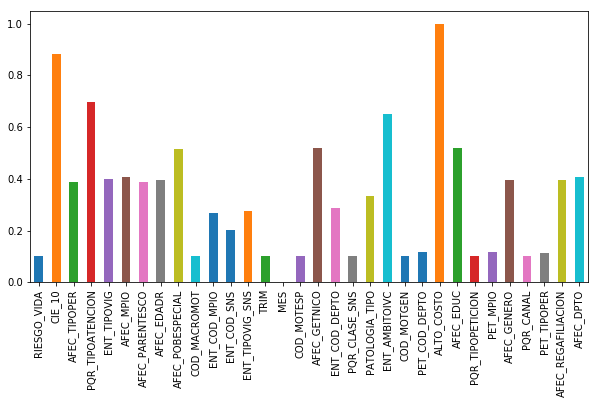

In [7]:
dataset.isnull().mean().plot(kind = 'bar', figsize=(10,5))

(281311, 32)


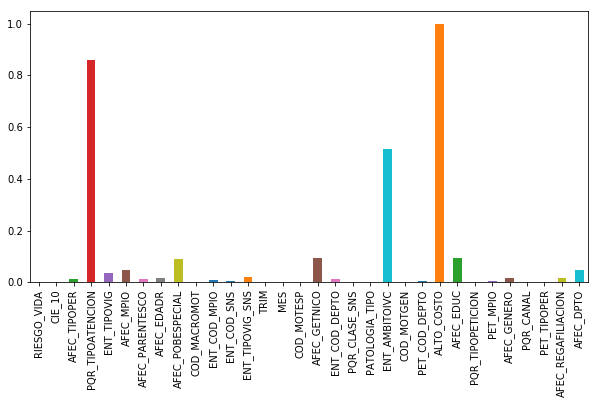

In [8]:
dataset = dataset[(dataset['CIE_10'].isnull() == False) & (dataset['CIE_10'] != 0)]
print(dataset.shape)
dataset.isnull().mean().plot(kind = 'bar', figsize=(10,5))

In [9]:
# Columns with no null values
nulls = set(dataset.columns[dataset.isnull().mean()>0.3])
print(len(nulls))
print(nulls)


3
{'ENT_AMBITOIVC', 'PQR_TIPOATENCION', 'ALTO_COSTO'}


In [12]:
dataset = dataset.drop(['ENT_AMBITOIVC', 'PQR_TIPOATENCION', 'ALTO_COSTO'], axis = 1)

In [13]:
# Columns with no null values
nulls = set(dataset.columns[dataset.isnull().mean() > 0])
print(len(nulls))
print(sorted(nulls))


19
['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO', 'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL', 'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'ENT_COD_DEPTO', 'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS', 'PATOLOGIA_TIPO', 'PET_COD_DEPTO', 'PET_MPIO', 'PET_TIPOPER']


In [14]:
imputer = Imputer()

dataset['AFEC_DPTO'] = imputer.impute(dataset[['AFEC_DPTO']], ImputerStrategy.MODE)
dataset['AFEC_EDADR'] = imputer.impute(dataset[['AFEC_EDADR']], ImputerStrategy.MODE)
dataset['AFEC_EDUC'] = imputer.impute(dataset[['AFEC_EDUC']], ImputerStrategy.MODE)
dataset['AFEC_GENERO'] = imputer.impute(dataset[['AFEC_GENERO']], ImputerStrategy.MODE)
dataset['AFEC_GETNICO'] = imputer.impute(dataset[['AFEC_GETNICO']], ImputerStrategy.MODE)
dataset['AFEC_MPIO'] = imputer.impute(dataset[['AFEC_MPIO']], ImputerStrategy.MODE)
dataset['AFEC_PARENTESCO'] = imputer.impute(dataset[['AFEC_PARENTESCO']], ImputerStrategy.MODE)
dataset['AFEC_POBESPECIAL'] = imputer.impute(dataset[['AFEC_POBESPECIAL']], ImputerStrategy.MODE)
dataset['AFEC_REGAFILIACION'] = imputer.impute(dataset[['AFEC_REGAFILIACION']], ImputerStrategy.MODE)
dataset['AFEC_TIPOPER'] = imputer.impute(dataset[['AFEC_TIPOPER']], ImputerStrategy.MODE)
dataset['ENT_COD_DEPTO'] = imputer.impute(dataset[['ENT_COD_DEPTO']], ImputerStrategy.MODE)
dataset['ENT_COD_MPIO'] = imputer.impute(dataset[['ENT_COD_MPIO']], ImputerStrategy.MODE)
dataset['ENT_COD_SNS'] = imputer.impute(dataset[['ENT_COD_SNS']], ImputerStrategy.MODE)
dataset['ENT_TIPOVIG'] = imputer.impute(dataset[['ENT_TIPOVIG']], ImputerStrategy.MODE)
dataset['ENT_TIPOVIG_SNS'] = imputer.impute(dataset[['ENT_TIPOVIG_SNS']], ImputerStrategy.MODE)
dataset['PATOLOGIA_TIPO'] = imputer.impute(dataset[['PATOLOGIA_TIPO']], ImputerStrategy.MODE)
dataset['PET_COD_DEPTO'] = imputer.impute(dataset[['PET_COD_DEPTO']], ImputerStrategy.MODE)
dataset['PET_MPIO'] = imputer.impute(dataset[['PET_MPIO']], ImputerStrategy.MODE)
dataset['PET_TIPOPER'] = imputer.impute(dataset[['PET_TIPOPER']], ImputerStrategy.MODE)



In [15]:
# Columns with no null values
nulls = set(dataset.columns[dataset.isnull().mean() > 0])
print(len(nulls))
print(nulls)


0
set()


In [16]:
display(dataset.head())
dataset.shape

,RIESGO_VIDA,CIE_10,AFEC_TIPOPER,ENT_TIPOVIG,AFEC_MPIO,AFEC_PARENTESCO,AFEC_EDADR,AFEC_POBESPECIAL,COD_MACROMOT,ENT_COD_MPIO,...,COD_MOTGEN,PET_COD_DEPTO,AFEC_EDUC,PQR_TIPOPETICION,PET_MPIO,AFEC_GENERO,PQR_CANAL,PET_TIPOPER,AFEC_REGAFILIACION,AFEC_DPTO
0,no,otra atención médica,natural,regimen subsidiado,bogotá,otro,de 13 a 17 años,no aplica,1.0,63130.0,...,101.0,11.0,ninguno,reclamo,bogotá,mujer,escrito,juridica,subsidiado,bogota d.c.
2,no,"asma, no especificada",natural,regimen contributivo,cali,abuelo (a),de 13 a 17 años,no aplica,1.0,76001.0,...,103.0,76.0,secundaria,reclamo,cali,hombre,telefonico,natural,contributivo,valle
3,no,agentes virales como causa de enfermedades cla...,natural,regimen contributivo,neiva,padre,de 13 a 17 años,no aplica,1.0,41001.0,...,106.0,41.0,universitario incompleto,reclamo,neiva,hombre,personalizado,natural,contributivo,huila
4,si,epilepsia y sindromes epilepticos idiopaticos ...,natural,regimen contributivo,dosquebradas,padre,de 13 a 17 años,persona en condición de discapacidad,1.0,66001.0,...,101.0,66.0,ninguno,reclamo,dosquebradas,hombre,personalizado,natural,contributivo,risaralda
6,no,otra atención médica,natural,regimen subsidiado,bogotá,otro,de 13 a 17 años,no aplica,1.0,11001.0,...,106.0,11.0,ninguno,reclamo,bogotá,hombre,escrito,juridica,subsidiado,bogota d.c.


(281311, 29)

In [17]:
dataset.to_csv("datasets/dataset_clean.csv", index = False)